In [1]:
import json
import numpy as np
import torch
import torchvision
from PIL import Image
import matplotlib.pyplot as plt

# HISTOGRAM OF THE DATASETS

In [2]:
# Load the datasets

first_thermal_json = '/home/am/work/prudence/dataset_first/TEST_thermal_images.json'
with open(first_thermal_json, 'r') as j:
     first_thermal= json.load(j)

first_depth_json = first_thermal_json.replace('thermal', 'depth')
with open(first_depth_json, 'r') as j:
     first_depth = json.load(j)


soumaya_thermal_json = '/home/am/work/prudence/dataset_soumaya/TEST_thermal_images.json'
with open(soumaya_thermal_json, 'r') as j:
     soumaya_thermal= json.load(j)

soumaya_depth_json = soumaya_thermal_json.replace('thermal', 'depth')
with open(soumaya_depth_json, 'r') as j:
     soumaya_depth = json.load(j)


gladis_thermal_json = '/home/am/work/prudence/dataset_gladis/TEST_thermal_images.json'
with open(gladis_thermal_json, 'r') as j:
     gladis_thermal= json.load(j)

gladis_depth_json = gladis_thermal_json.replace('thermal', 'depth')
with open(gladis_depth_json, 'r') as j:
     gladis_depth = json.load(j)


troyes_thermal_json = '/home/am/work/prudence/dataset_troyes/TEST_thermal_images.json'
with open(troyes_thermal_json, 'r') as j:
     troyes_thermal= json.load(j)

troyes_depth_json = troyes_thermal_json.replace('thermal', 'depth')
with open(troyes_depth_json, 'r') as j:
     troyes_depth = json.load(j)

datasets_thermal = {'first': [np.array(Image.open(img)) for img in first_thermal],
                    'soumaya': [np.array(Image.open(img)) for img in soumaya_thermal],
                    'troyes': [np.array(Image.open(img)) for img in troyes_thermal],
                    'gladis': [np.array(Image.open(img)) for img in gladis_thermal]}

datasets_depth = {'first': [np.array(Image.open(img)) for img in first_depth],
                  'soumaya': [np.array(Image.open(img)) for img in soumaya_depth],
                  'troyes': [np.array(Image.open(img)) for img in troyes_depth],
                  'gladis': [np.array(Image.open(img)) for img in gladis_depth]}

print("Nb thermal images")
for k, v in datasets_thermal.items():
    print(f'{k}: {len(v)}')

print("\nNb depth images")
for k, v in datasets_depth.items():
    print(f'{k}: {len(v)}')
    
datasets = {'thermal': datasets_thermal, 'depth': datasets_depth}

Nb thermal images
first: 603
soumaya: 239
troyes: 37
gladis: 152

Nb depth images
first: 603
soumaya: 239
troyes: 37
gladis: 152


In [3]:
# image-wise computation of mean and std of the thermal dataset
for k1, v1 in datasets.items():
    print('\n' + k1)
    for k2, v2 in v1.items():
        mean = 0
        std = 0
        for img in v2:
            mean += img.mean()
            std += img.std()

        mean /= len(v2)
        std /= len(v2)
        print(f'{k2}: mean:{mean}, std:{std}')


thermal
first: mean:29164.4998825318, std:188.43073131134895
soumaya: mean:29307.78712081588, std:152.86097976507284
troyes: mean:29592.921615990985, std:110.04167655990629
gladis: mean:7564.610124725879, std:33.221926535411434

depth
first: mean:3203.5534386228574, std:822.4752207343255
soumaya: mean:3448.5526874536927, std:1384.608568249778
troyes: mean:3567.891974063908, std:2752.765484965967
gladis: mean:2797.317192040157, std:855.4115957035601


## Notes:
- Thermal-gladis has a significant lower mean and lower std

In [4]:
# pixel-wise computation of mean and std of the thermal dataset
for k1, v1 in datasets.items():
    print('\n' + k1)
    for k2, v2 in v1.items():
        dataset = np.stack(v2, axis=0)
        mean = dataset.mean()
        std = dataset.std()
        print(f'{k2}: mean:{mean}, std:{std}')


thermal
first: mean:29164.499882531785, std:210.66823794465012
soumaya: mean:29307.7871208159, std:174.43718030670107
troyes: mean:29592.921615990992, std:138.01608124199726
gladis: mean:7564.6101247258775, std:38.56382621281171

depth
first: mean:3203.553438622858, std:877.3643020306693
soumaya: mean:3448.5526874536918, std:1460.6431986718026
troyes: mean:3567.8919740639076, std:2872.8684562956228
gladis: mean:2797.317192040159, std:872.1115716416024


## Notes:
- pixe-wise std is close to the image-wise std --> no outlier in each respective dataset

## Plot thermal histograms

In [5]:
import seaborn as sns
palette = sns.color_palette()

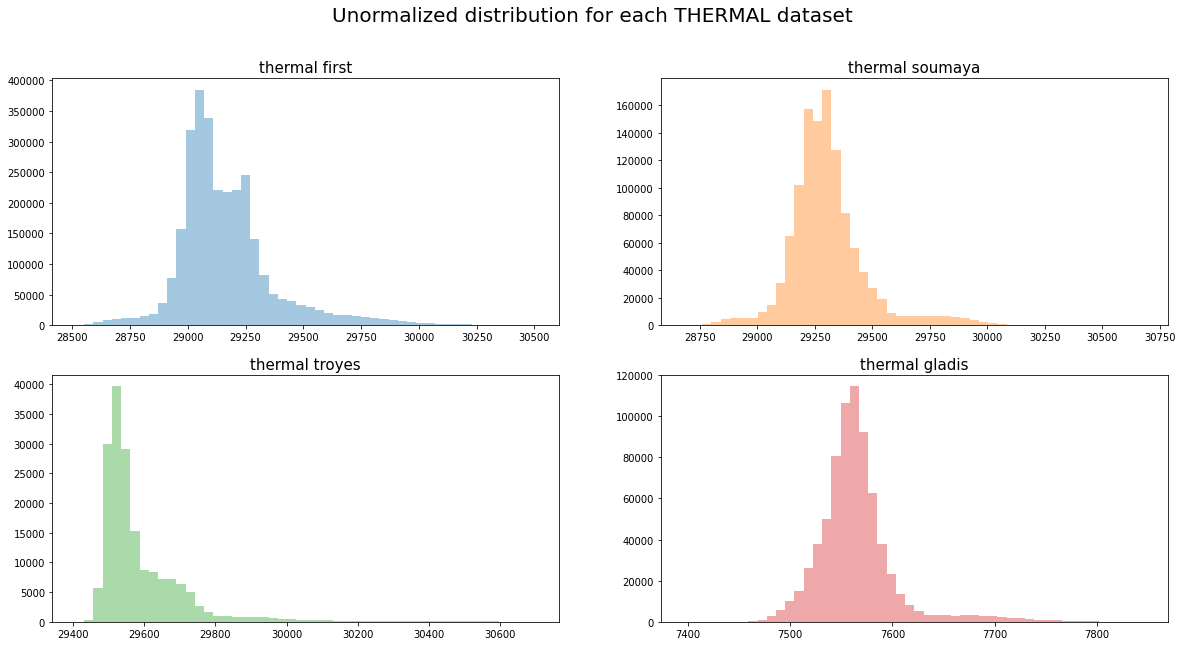

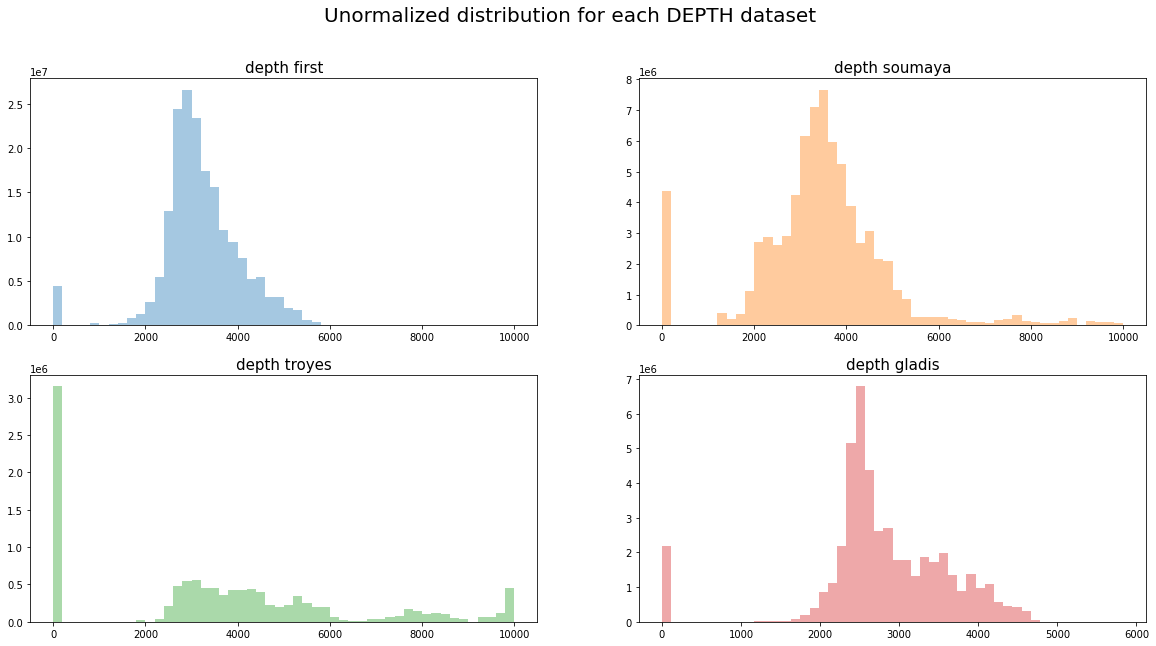

In [6]:
f, axes = plt.subplots(2, 2, figsize=(20,10))
for i, d in enumerate(zip(datasets_thermal.keys(), axes.reshape(-1))):
    sns.distplot(np.stack(datasets_thermal[d[0]]).flatten(), color=palette[i], label=f'thermal {d[0]}', ax=d[1], kde=False)
    d[1].set_title(f'thermal {d[0]}', fontsize=15)
f.suptitle('Unormalized distribution for each THERMAL dataset', fontsize=20)
plt.show()

f, axes = plt.subplots(2, 2, figsize=(20,10))
for i, d in enumerate(zip(datasets_depth.keys(), axes.reshape(-1))):
    sns.distplot(np.stack(datasets_depth[d[0]]).flatten(), color=palette[i], label=f'depth {d[0]}', ax=d[1], kde=False)
    d[1].set_title(f'depth {d[0]}', fontsize=15)
f.suptitle('Unormalized distribution for each DEPTH dataset', fontsize=20)
plt.show()

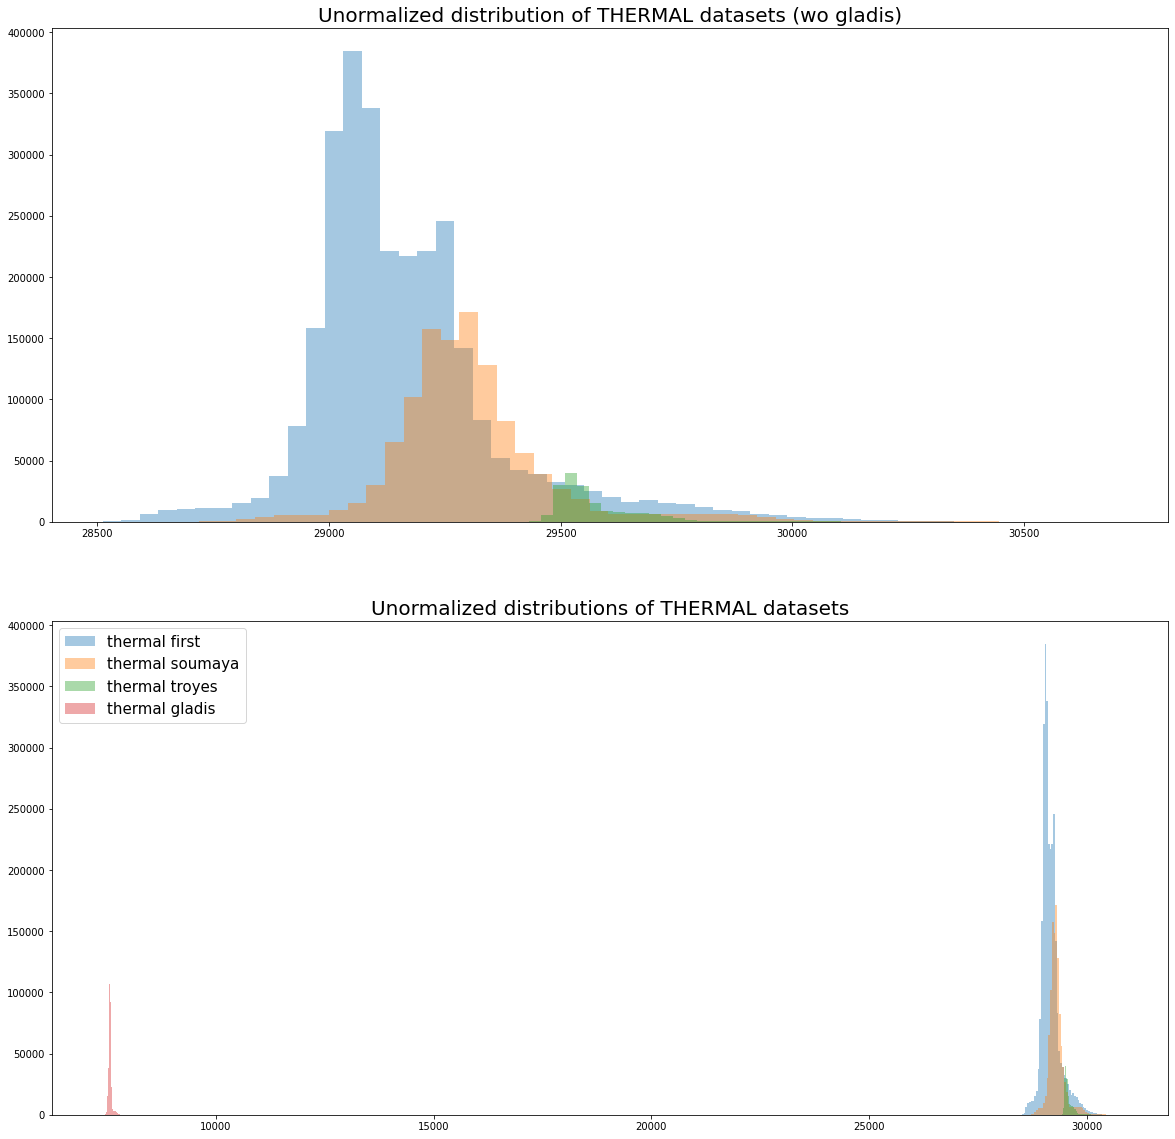

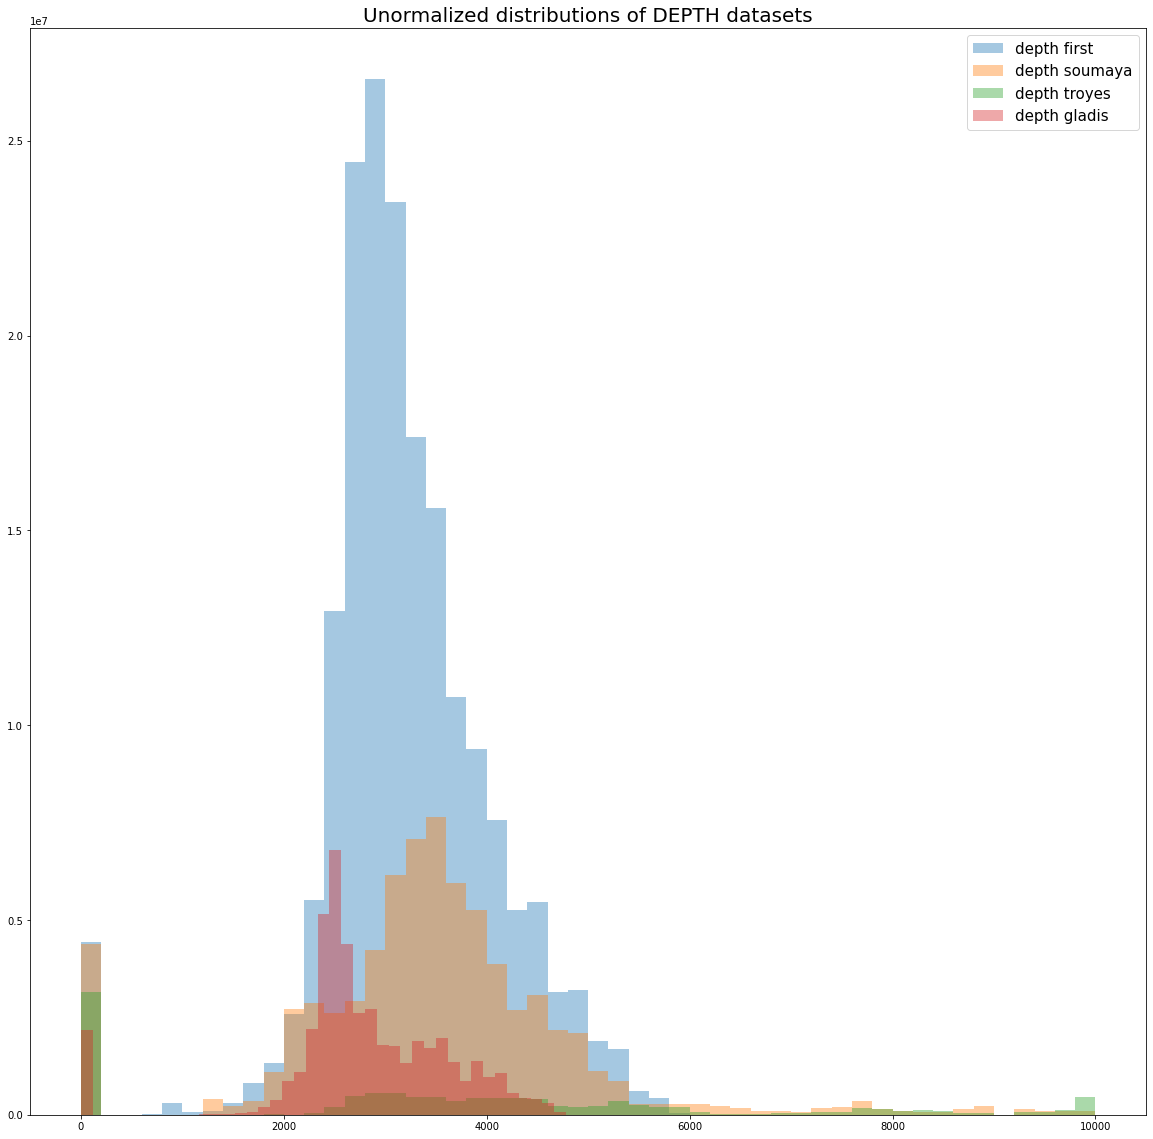

In [7]:
# Thermal
f, axes = plt.subplots(2, 1, figsize=(20,20))
for i, d in enumerate(list(datasets_thermal.keys())[:-1]):
    sns.distplot(np.stack(datasets_thermal[d]).flatten(), color=palette[i], label=d, ax=axes[0], kde=False)
axes[0].set_title('Unormalized distribution of THERMAL datasets (wo gladis)', fontsize=20)

for i, d in enumerate(datasets_thermal.keys()):
    sns.distplot(np.stack(datasets_thermal[d]).flatten(), color=palette[i], label=f'thermal {d}', ax=axes[1], kde=False)
axes[1].set_title('Unormalized distributions of THERMAL datasets', fontsize=20)

plt.legend(prop={'size': 15})
plt.show()

# Depth
f = plt.figure(figsize=(20,20))
for i, d in enumerate(datasets_depth.keys()):
    sns.distplot(np.stack(datasets_depth[d]).flatten(), color=palette[i], label=f'depth {d}', kde=False)
plt.title('Unormalized distributions of DEPTH datasets', fontsize=20)

plt.legend(prop={'size': 15})
plt.show()

## Z-standardization of depth images

In [55]:
first_img = np.array(Image.open('/home/am/work/prudence/dataset_first/data_no_fusion_Serie_1/Profondeur/depth2.png'))
soumaya_img = np.array(Image.open('/home/am/work/prudence/dataset_soumaya/Degrade_Antoine_Chambre_Serie_0/Profondeur/depth_34.png'))
troyes_img = np.array(Image.open('/home/am/work/prudence/dataset_troyes/Troyes_2_Serie_5/Profondeur/depth1.png'))
gladis_img = np.array(Image.open('/home/am/work/prudence/dataset_gladis/dataset_GLADIS4_2015_10_11/Profondeur/18_47_08_depth.png'))

images = {'first_img': first_img,
          'soumaya_img': soumaya_img,
          'troyes_img': troyes_img,
          'gladis_img': gladis_img}

In [56]:
# image-wise Z-standardization
img_stand_dict = {k: (v - v.mean())/v.std() for k, v in images.items()}

In [57]:
# Global Z-standardisation

# dataset creation (sum of all datasets)
datasets = []
for d in datasets_depth.values():
    datasets += d
# mean and std computation of the entire dataset
mean = 0
std = 0
for img in datasets:
    mean += img.mean()
    std += img.std()
datasets_mean = mean/len(datasets)
datasets_std = std/len(datasets)

# standardization
img_stand_dataset_dict = {k: (v - datasets_mean)/datasets_std for k, v in images.items()}

In [58]:
for (dataset, img), img_stand, img_stand_dataset in zip(images.items(), img_stand_dict.values(), img_stand_dataset_dict.values()):
    print(f'\n{dataset}:')
    print('min:',img.min(), img_stand.min(), img_stand_dataset.min())
    print('max:', img.max(), img_stand.max(), img_stand_dataset.max())
    print('mean:', img.mean(), img_stand.mean(), img_stand_dataset.mean())
    print('std:', img.std(), img_stand.std(), img_stand_dataset.std()) 


first_img:
min: 0 -2.768833196020593 -3.129307675235676
max: 6124 2.384676429700789 2.8341875890854324
mean: 3290.249892578125 -1.3026616822268503e-16 0.07470761751786478
std: 1188.3163988740528 0.9999999999999997 1.157171655323404

soumaya_img:
min: 0 -2.7692046043017857 -3.129307675235676
max: 10000 4.559577815840868 6.6086009862945465
mean: 3778.5329752604166 -2.960594732333751e-18 0.5501932235309216
std: 1364.4831333122524 1.0 1.328721212239328

troyes_img:
min: 0 -1.102065010970835 -3.129307675235676
max: 10000 1.5619923964661706 6.6086009862945465
mean: 4136.791526692708 -4.884981308350689e-17 0.8990621286368986
std: 3753.672864587645 0.9999999999999996 3.6552923500618992

gladis_img:
min: 0 -3.844804123149876 -3.129307675235676
max: 4842 2.896586301800266 1.5857876986772579
mean: 2761.528466796875 1.3026616822268503e-16 -0.44015647764731947
std: 718.2494551983777 1.0 0.6994247590915645


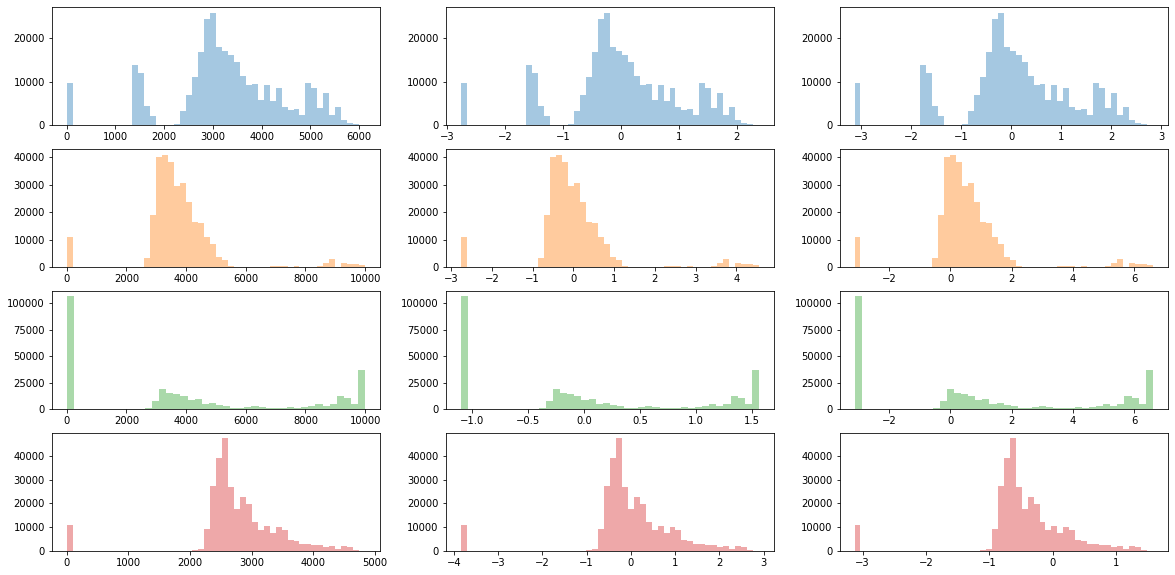

In [59]:
f, axes = plt.subplots(4, 3, figsize=(20,10))
for i, d in enumerate(images.keys()):
    sns.distplot(images[d].flatten(), color=palette[i], label=f'thermal {d}', ax=axes[i][0], kde=False)
    sns.distplot(img_stand_dict[d].flatten(), color=palette[i], label=f'thermal {d}', ax=axes[i][1], kde=False)
    sns.distplot(img_stand_dataset_dict[d].flatten(), color=palette[i], label=f'thermal {d}', ax=axes[i][2], kde=False)

## Normalization of depth images

In [60]:
dataset_min = np.stack(datasets).min()
dataset_max = np.stack(datasets).max()
dataset_min, dataset_max

(0, 10000)

In [61]:
img_norm_dict = {k: (v-v.min())/(v.max()-v.min()) for k, v in images.items()}
img_norm_dataset_dict = {k: (v-dataset_min)/(dataset_max-dataset_min) for k, v in images.items()}

In [62]:
for (dataset, img), img_norm, img_norm_dataset in zip(images.items(), img_norm_dict.values(), img_norm_dataset_dict.values()):
    print(f'\n{dataset}:')
    print('min:',img.min(), img_norm.min(), img_norm_dataset.min())
    print('max:', img.max(), img_norm.max(), img_norm_dataset.max())
    print('mean:', img.mean(), img_norm.mean(), img_norm_dataset.mean())
    print('std:', img.std(), img_norm.std(), img_norm_dataset.std()) 


first_img:
min: 0 0.0 0.0
max: 6124 1.0 0.6124
mean: 3290.249892578125 0.5372713737064214 0.32902498925781243
std: 1188.3163988740528 0.1940425210440974 0.11883163988740525

soumaya_img:
min: 0 0.0 0.0
max: 10000 1.0 1.0
mean: 3778.5329752604166 0.3778532975260416 0.3778532975260416
std: 1364.4831333122524 0.13644831333122526 0.13644831333122526

troyes_img:
min: 0 0.0 0.0
max: 10000 1.0 1.0
mean: 4136.791526692708 0.41367915266927063 0.41367915266927063
std: 3753.672864587645 0.3753672864587645 0.3753672864587645

gladis_img:
min: 0 0.0 0.0
max: 4842 1.0 0.4842
mean: 2761.528466796875 0.5703280600571818 0.27615284667968754
std: 718.2494551983777 0.14833735134208545 0.07182494551983777


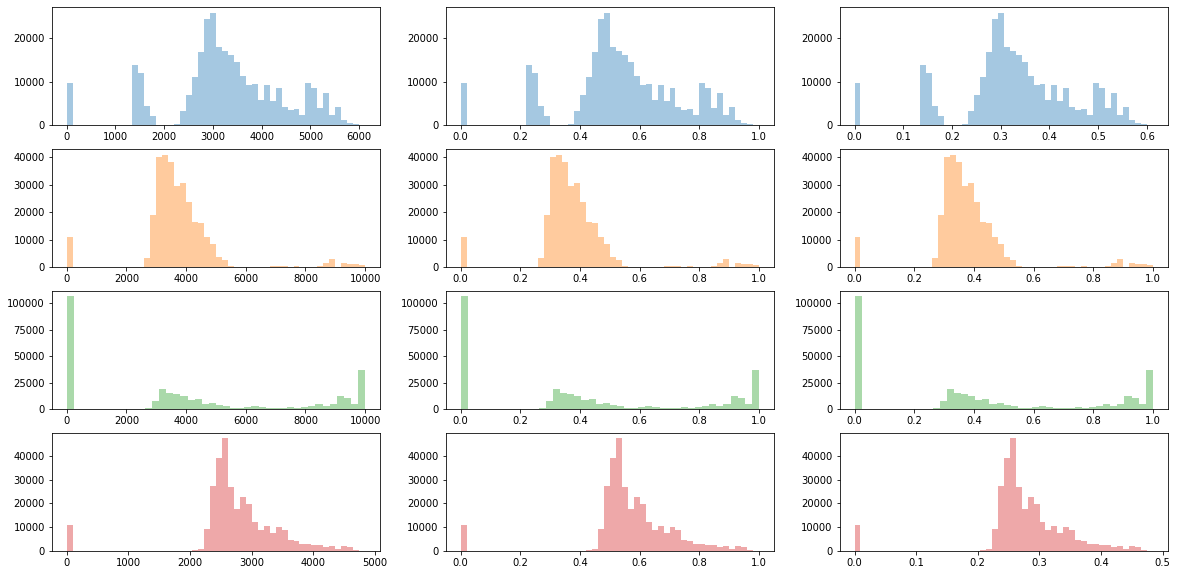

In [63]:
f, axes = plt.subplots(4, 3, figsize=(20,10))
for i, d in enumerate(images.keys()):
    sns.distplot(images[d].flatten(), color=palette[i], label=f'thermal {d}', ax=axes[i][0], kde=False)
    sns.distplot(img_norm_dict[d].flatten(), color=palette[i], label=f'thermal {d}', ax=axes[i][1], kde=False)
    sns.distplot(img_norm_dataset_dict[d].flatten(), color=palette[i], label=f'thermal {d}', ax=axes[i][2], kde=False)